In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from boostaroota import BoostARoota
from IPython.core.display import display
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import mean_absolute_error

In [4]:
df = pd.read_csv('Datasets/train.csv')
df.head()

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
0,mof_unit_1,1116.667429,875.240600,0.00,0.07899,0.0607,COOH-OEt,3,4,11,pcu,22.864166,6.786041,105.284502
1,mof_unit_2,2769.503842,2211.697211,603.61,0.13794,0.1040,F-OMe,10,44,57,etb,33.616780,7.147286,101.224774
2,mof_unit_3,1089.818728,773.687960,788.50,0.14874,0.1262,OMe-COOH,2,22,24,pcu,19.263726,6.347967,118.987011
3,mof_unit_4,2205.198301,1304.638720,1441.53,0.21814,0.2220,H-SO3H,9,17,24,sra,25.701377,6.190085,187.626004
4,mof_unit_5,1137.800963,901.736120,0.00,0.07778,0.0591,NHMe-OH,2,1,22,pcu,30.001838,6.478063,79.210001


In [52]:
func_df = df.groupby('functional_groups').count()
func_df.head()

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
functional_groups,,,,,,,,,,,,,
Br,687,687,687,687,687,687,687,687,687,687,687,667,687
Br-CN,72,72,72,72,72,72,72,72,72,72,72,67,72
Br-COOH,120,120,120,120,120,120,120,120,120,120,120,116,120
Br-Cl,112,112,112,112,112,112,112,112,112,112,112,108,112
Br-Et,94,94,94,94,94,94,94,94,94,94,94,90,94


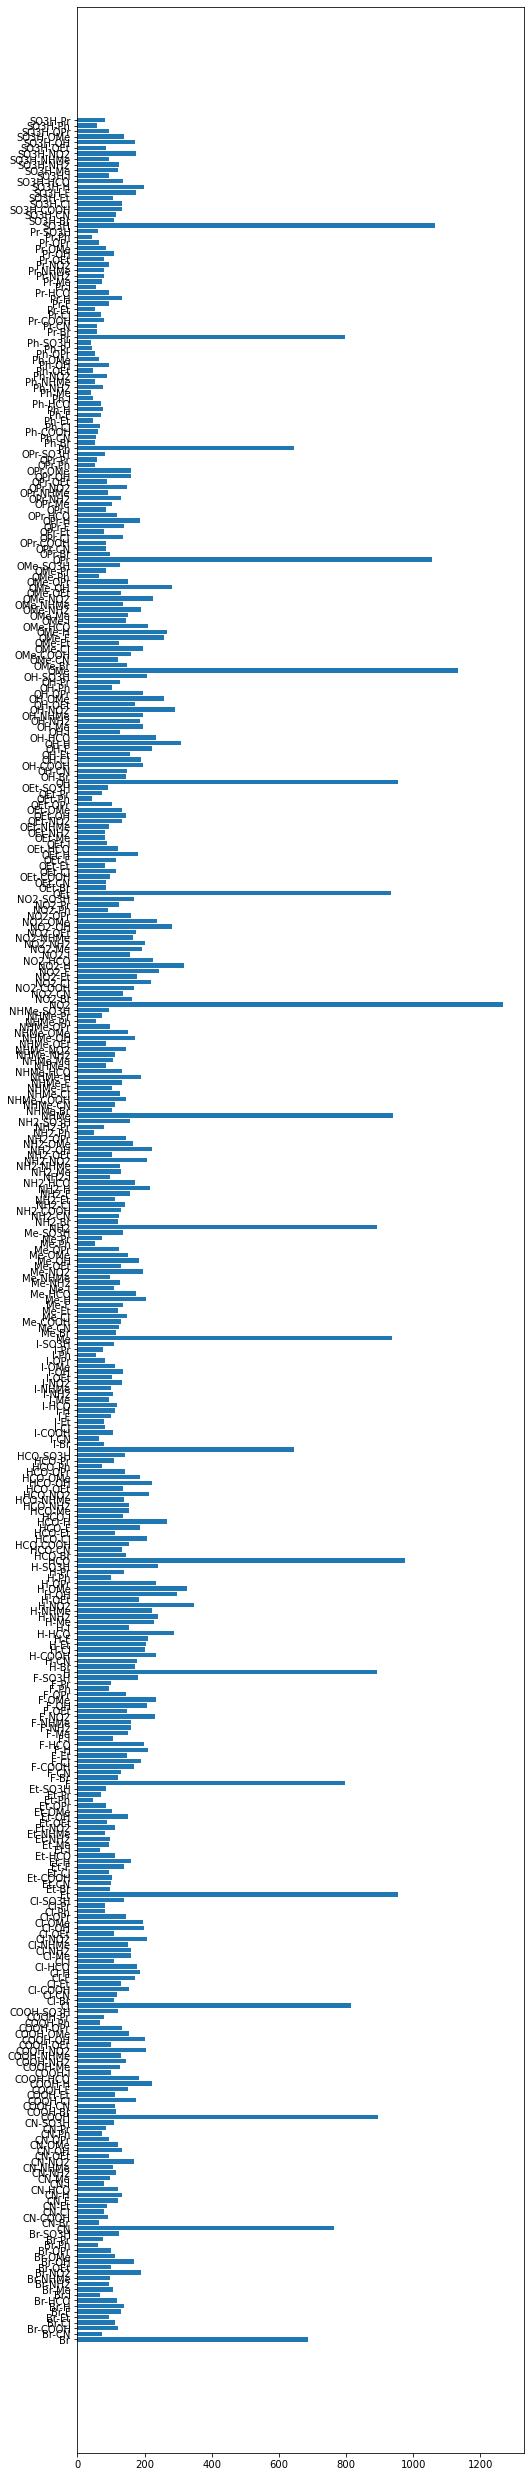

In [59]:
plt.figure(figsize=(8,45))
plt.barh(func_df.index,func_df['MOFname'])
plt.show()